In [66]:
using DecisionMakingProblems
using MCTS
using Statistics
using Plots
using LaTeXStrings
using BenchmarkTools

In [5]:
twenty_forty_eight = DecisionMakingProblems.TwentyFortyEight(γ=0.99)

mdp = DecisionMakingProblems.MDP(twenty_forty_eight)

MDP(0.99, nothing, (0x00, 0x01, 0x02, 0x03), nothing, DecisionMakingProblems.var"#27#29"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
), DecisionMakingProblems.var"#28#30"{DecisionMakingProblems.TwentyFortyEight}(DecisionMakingProblems.TwentyFortyEight
  γ: Float64 0.99
))

In [7]:
π_rand(s) = rand(DecisionMakingProblems.DIRECTIONS)

π_rand (generic function with 1 method)

In [37]:
rollouts_random = [ MCTS.rollout(mdp, DecisionMakingProblems.initial_board(), π_rand, 10000) for i in 1:100 ]

print("$(mean(rollouts_random)) ± $(std(rollouts_random))")

551.9181166255411 ± 151.58143640933616

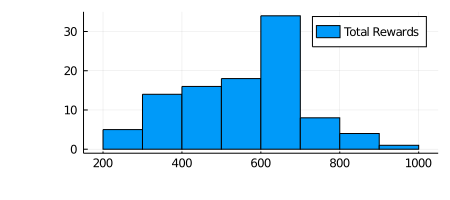

In [64]:
histogram(rollouts_random, label="Total Rewards", size=(600*3, 400*2), thickness_scaling=4.0)

In [41]:
MonteCarloTreeSearch(𝒫, N, Q, d, m, c, U) in MCTS at /Users/maxwellrussek/code/tmp/MCTS.jl/src/MCTS.jl:100()

MonteCarloTreeSearch

In [70]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

board = DecisionMakingProblems.initial_board()

@benchmark MCTS.rollout(mdp, board, mcts_problem, 100)

BenchmarkTools.Trial: 
  memory estimate:  39.23 MiB
  allocs estimate:  1494086
  --------------
  minimum time:     89.127 ms (0.00% GC)
  median time:      106.101 ms (0.00% GC)
  mean time:        121.408 ms (5.28% GC)
  maximum time:     497.231 ms (25.67% GC)
  --------------
  samples:          42
  evals/sample:     1

In [102]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

rollouts_mcts_U0 = [ MCTS.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 100) for i in 1:100 ]

print("$(mean(rollouts_mcts_U0)) ± $(std(rollouts_mcts_U0))")

711.5186679735147 ± 35.44848506875175

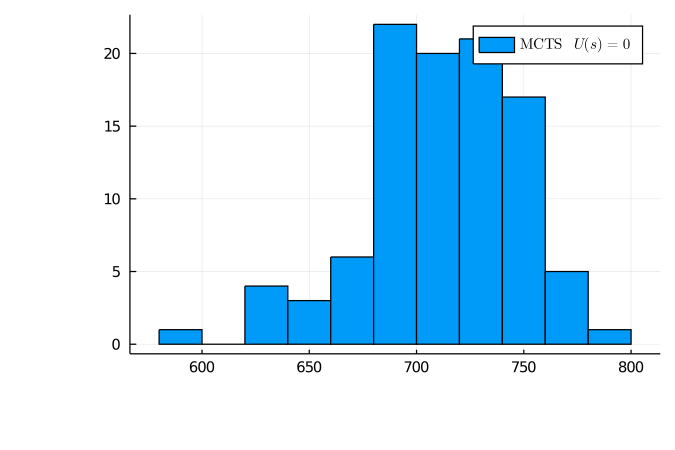

In [110]:
histogram(rollouts_mcts_U0, label=L"\mathrm{MCTS} \quad U(s) = 0", size=(600*4.5, 400*4.5), thickness_scaling=5.)

In [119]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> MCTS.rollout(mdp, s, π_rand, 100) # U
)

rollouts_mcts_U = [ MCTS.rollout(mdp, DecisionMakingProblems.initial_board(), mcts_problem, 100) for i in 1:100 ]

print("$(mean(rollouts_mcts_U)) ± $(std(rollouts_mcts_U))")

158.0298481904914 ± 186.1888573573974

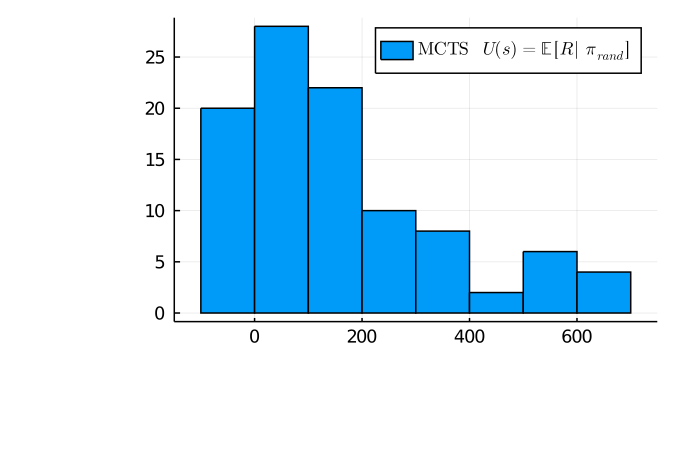

In [120]:
histogram(rollouts_mcts_U, label=L"\mathrm{MCTS} \quad U(s) = \mathbb{E}\,[R\,|\,\pi_{rand}]", size=(600*4.5, 400*4.5), thickness_scaling=6.)

In [124]:
mcts_problem = MCTS.MonteCarloTreeSearch(
    mdp, # 𝒫
    Dict{Tuple{UInt64, UInt8}, Float64}(), # Q
    Dict{Tuple{UInt64, UInt8}, Float64}(), # N
    10, # d
    100, # m
    5.0, # c
    s -> 0 # U
)

DecisionMakingProblems.play_game(s -> mcts_problem(s))

Move #1, current score=0.0
     2     0     0     0
     0     0     0     0
     0     0     0     0
     2     0     0     0

	a = UP
Move #2, current score=4.0
     4     0     0     0
     0     0     4     0
     0     0     0     0
     0     0     0     0

	a = UP
Move #3, current score=4.0
     4     0     4     2
     0     0     0     0
     0     0     0     0
     0     0     0     0

	a = RIGHT
Move #4, current score=12.0
     0     0     8     2
     0     0     0     0
     0     0     0     0
     0     0     2     0

	a = DOWN
Move #5, current score=12.0
     0     2     0     0
     0     0     0     0
     0     0     8     0
     0     0     2     2

	a = LEFT
Move #6, current score=16.0
     2     0     0     0
     0     0     0     4
     8     0     0     0
     4     0     0     0

	a = DOWN
Move #7, current score=16.0
     0     0     0     0
     2     0     0     0
     8     0     0     2
     4     0     0     4

	a = RIGHT
Move #8, current score=24.0
    

	a = UP
Move #100, current score=1108.0
     0    16     8     4
     2     2   128     8
     0     0     4    64
     0     0     0     8

	a = DOWN
Move #101, current score=1108.0
     0     0     2     4
     0     0     8     8
     0    16   128    64
     2     2     4     8

	a = LEFT
Move #102, current score=1128.0
     2     4     0     0
    16     0     0     2
    16   128    64     0
     4     4     8     0

	a = DOWN
Move #103, current score=1160.0
     0     0     0     0
     2     4     0     0
    32   128    64     4
     4     4     8     2

	a = LEFT
Move #104, current score=1168.0
     0     0     0     0
     2     4     0     2
    32   128    64     4
     8     8     2     0

	a = RIGHT
Move #105, current score=1184.0
     0     0     0     0
     0     2     4     2
    32   128    64     4
     0     4    16     2

	a = LEFT
Move #106, current score=1184.0
     0     0     2     0
     2     4     2     0
    32   128    64     4
     4    16     2     0



     4    16     2     0
   256     2    64    16
     2    32    64     0

	a = DOWN
Move #189, current score=2624.0
     2     0     2     0
     4    16     0     0
   256     2     2     0
     2    32   128    16

	a = LEFT
Move #190, current score=2632.0
     4     0     0     0
     4    16     0     2
   256     4     0     0
     2    32   128    16

	a = DOWN
Move #191, current score=2640.0
     2     0     0     0
     8    16     0     0
   256     4     0     2
     2    32   128    16

	a = RIGHT
Move #192, current score=2640.0
     2     0     0     2
     0     0     8    16
     0   256     4     2
     2    32   128    16

	a = LEFT
Move #193, current score=2644.0
     4     0     0     0
     8    16     4     0
   256     4     2     0
     2    32   128    16

	a = RIGHT
Move #194, current score=2644.0
     4     0     0     4
     0     8    16     4
     0   256     4     2
     2    32   128    16

	a = RIGHT
Move #195, current score=2652.0
     0     4     0   

	a = DOWN
Move #274, current score=3648.0
     2     2     8     4
     8     8    32   128
    64   256     4     2
     2    16   128     4

	a = LEFT
Move #275, current score=3668.0
     4     8     4     2
    16    32   128     0
    64   256     4     2
     2    16   128     4

	a = UP
Move #276, current score=3672.0
     4     8     4     4
    16    32   128     4
    64   256     4     0
     2    16   128     2

	a = LEFT
Move #277, current score=3680.0
     4     8     8     0
    16    32   128     4
    64   256     4     4
     2    16   128     2

	a = RIGHT
Move #278, current score=3704.0
     0     2     4    16
    16    32   128     4
     0    64   256     8
     2    16   128     2

	a = DOWN
Move #279, current score=3704.0
     0     2     4    16
     2    32   128     4
    16    64   256     8
     2    16   128     2

	a = UP
Move #280, current score=3704.0
     2     2     4    16
    16    32   128     4
     2    64   256     8
     2    16   128     2

	a

     0     0     8    32
     2    64   256    16
     0     8   512     2

	a = UP
Move #373, current score=6100.0
     2    64     2     4
     0     8     8    32
     0     0   256    16
     2     0   512     2

	a = LEFT
Move #374, current score=6116.0
     2    64     2     4
    16    32     0     0
   256    16     0     0
     2   512     2     2

	a = UP
Move #375, current score=6120.0
     2    64     4     4
    16    32     2     2
   256    16     0     0
     2   512     0     0

	a = RIGHT
Move #376, current score=6132.0
     0     2    64     8
     0    16    32     4
     0     0   256    16
     0     2     2   512

	a = RIGHT
Move #377, current score=6136.0
     0     2    64     8
     0    16    32     4
     0     0   256    16
     2     0     4   512

	a = UP
Move #378, current score=6136.0
     2     2    64     8
     0    16    32     4
     2     0   256    16
     0     0     4   512

	a = RIGHT
Move #379, current score=6140.0
     0     4    64     8
  